# Planar data classification with one hidden layer

Welcome to your day3 programming section. It's time to build your first neural network, which will have a hidden layer. You will see a big difference between this model and the one you implemented using logistic regression. 

**You will learn how to:**
- Implement a 2-class classification neural network with a single hidden layer
- Use units with a non-linear activation function, such as tanh 
- Compute the cross entropy loss 
- Implement forward and backward propagation

Reference:
- http://scs.ryerson.ca/~aharley/neural-networks/
- http://cs231n.github.io/neural-networks-case-study/ 

## 1 - import python files ##

Let's first import all the packages that you will need during this assignment.
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [sklearn](http://scikit-learn.org/stable/) provides simple and efficient tools for data mining and data analysis. 
- [matplotlib](http://matplotlib.org) is a library for plotting graphs in Python.
- testCases provides some test examples to assess the correctness of your functions
- planar_utils provide various useful functions used in this assignment

In [34]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt

import sklearn
# Dataset
import sklearn.datasets
# Model
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets
from keras.models import Sequential
from keras.layers import Dense

# Split train and test sets
from sklearn.model_selection import train_test_split

# This is how we usually import written py files to use the functions/classes in those files
from testCases import *

# Visualization
%matplotlib inline
from mlxtend.plotting import plot_decision_regions

np.random.seed(1) # set a seed so that the results are consistent

## 2 - Dataset ##

First, let's get the dataset you will work on. The following code will load a "flower" 2-class dataset into variables `X` and `Y`.

In [35]:
X, Y = load_planar_dataset()

Visualize the dataset using matplotlib. The data looks like a "flower" with some red (label y=0) and some blue (y=1) points. Your goal is to build a model to fit this data. 

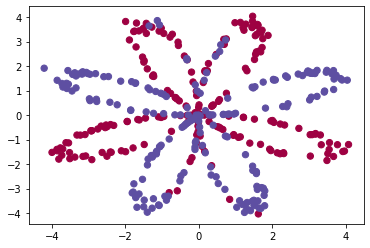

In [36]:
# Visualize the data:
# c: carray-like or list of colors or color, optional
# camp: str or Colormap, default: rcParams["image.cmap"] (default: 'viridis')
# A Colormap instance or registered colormap name. cmap is only used if c is an array of floats.
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);
plt.show()

You have:
    - a numpy-array (matrix) X that contains your features (x1, x2)
    - a numpy-array (vector) Y that contains your labels (red:0, blue:1).

Lets first get a better sense of what our data is like. 

**Exercise**: How many training examples do you have? In addition, what is the `shape` of the variables `X` and `Y`? 

**Hint**: How do you get the shape of a numpy array? [(help)](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html)

In [37]:
### START CODE HERE ### (≈ 3 lines of code)
shape_X = X.shape
shape_Y = Y.shape
m = shape_Y[1]  # training set size
### END CODE HERE ###

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('The dataset has m = %d examples!' % (m))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
The dataset has m = 400 examples!


**Expected Output**:
       
<table style="width:20%">
  
  <tr>
    <td>**shape of X**</td>
    <td> (2, 400) </td> 
  </tr>
  
  <tr>
    <td>**shape of Y**</td>
    <td>(1, 400) </td> 
  </tr>
  
    <tr>
    <td>**m**</td>
    <td> 400 </td> 
  </tr>
  
</table>

**Cross validation**

Try to split the dataset into training and test set with the function train_test_split with test_size = 0.2 and random_state = 0.

Remenber to transpose the matrix before you input it into the function.

In [38]:
# Solution:
X = X.T
Y = Y.T
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0) # Leave this line blank for exercise

## 3 - Simple Logistic Regression

Before building a full neural network, lets first see how logistic regression performs on this problem. You can use sklearn's built-in functions to do that. Run the code below to train a logistic regression classifier on the dataset.

In [39]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X_train, y_train);

/Users/pengning/miniconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


You can now plot the decision boundary of these models. Run the code below.

Accuracy of logistic regression: %d 51.24999999999999% (percentage of correctly labelled datapoints)


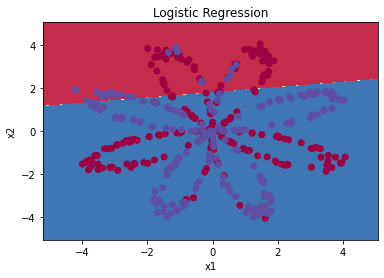

In [40]:
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X.T, Y.T) # Dimensional purpose
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X_test)
accuracy_socre = clf.score(X_test, y_test)

# To print a number, we need to first convert it to a string by using 
print ('Accuracy of logistic regression: %d '+ str(accuracy_socre*100)+
       '% ' + "(percentage of correctly labelled datapoints)")

**Expected Output**:

<table style="width:20%">
  <tr>
    <td>**Accuracy**</td>
    <td> 51.24999999999999% </td> 
  </tr>
  
</table>


**Interpretation**: The dataset is not linearly separable, so logistic regression doesn't perform well. Hopefully a neural network will do better. Let's try this now!


**Extended reading**:
Proof that the decision boundary of logistics regression is linear:https://homes.cs.washington.edu/~marcotcr/blog/linear-classifiers/

## 4 - Neural Network model

Logistic regression did not work well on the "flower dataset". You are going to train a Neural Network with a single hidden layer.

**Here is our model**:
<img src="images/classification_kiank.png" style="width:600px;height:300px;">


**Reminder**: The general methodology to build a Neural Network is to:

    1. Define the neural network structure ( # of input units,  # of hidden units, etc) 
    2. Compile the model
    3. Fit the model
    4. Evaluate the model

Steps 3-4 are like what we did in Tuesday's lab section.

### 4.1 - 4.2  - Defining the neural network structure and compile the model ####

In [41]:
# Step 1: Define the neural network structure ( # of input units,  # of hidden units, etc).
def build_model(input_dim, #int
                first_hidden_layer_node_num = 4, #int
                activation_function='sigmoid' #str
               ):
    # define the keras model
    # https://keras.io/api/models/sequential/
    model = Sequential()
    # The model expects rows of data with 2 variables (the input_dim=2 argument)
    # The first hidden layer has 12 nodes and uses the relu activation function
    model.add(Dense(first_hidden_layer_node_num, input_dim=input_dim, activation='tanh'))
    # The output layer has one node and uses the sigmoid activation function
    model.add(Dense(1, activation=activation_function))
    # compile the keras model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

**To help understand adam greadient decent method, an illustration is as below**


**Illustration**: The gradient descent algorithm with a good learning rate (converging) and a bad learning rate (diverging). Images courtesy of Adam Harley.

<img src="images/sgd.gif" style="width:400;height:400;"> <img src="images/sgd_bad.gif" style="width:400;height:400;">



### 4.3 - Fit the model ####
Now we fit the model with training data


In [42]:
# fit the keras model on the dataset
model = build_model(input_dim = 2, first_hidden_layer_node_num = 4, activation_function='sigmoid')
model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
32/32 [==============================] - 0s 846us/step - loss: 0.7590 - accuracy: 0.4759
Epoch 2/150
32/32 [==============================] - 0s 803us/step - loss: 0.7415 - accuracy: 0.4880
Epoch 3/150
32/32 [==============================] - 0s 723us/step - loss: 0.7460 - accuracy: 0.4896
Epoch 4/150
32/32 [==============================] - 0s 621us/step - loss: 0.7136 - accuracy: 0.5530
Epoch 5/150
32/32 [==============================] - 0s 568us/step - loss: 0.7036 - accuracy: 0.5437
Epoch 6/150
32/32 [==============================] - 0s 617us/step - loss: 0.6891 - accuracy: 0.5654
Epoch 7/150
32/32 [==============================] - 0s 725us/step - loss: 0.6785 - accuracy: 0.6054
Epoch 8/150
32/32 [==============================] - 0s 588us/step - loss: 0.6764 - accuracy: 0.5889
Epoch 9/150
32/32 [==============================] - 0s 572us/step - loss: 0.6447 - accuracy: 0.6895
Epoch 10/150
32/32 [==============================] - 0s 620us/step - loss: 0.6422 - accura

### 4.4 - Evaluate the model ####

It is time to run the model and see how it performs on a planar dataset. Run the following code to test your model with a single hidden layer of $1$ hidden units.

In [43]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

3/3 [==============================] - 0s 1ms/step - loss: 0.4550 - accuracy: 0.8125
Accuracy: 81.25


**Expected Output**:

<table style="width:40%">
  <tr>
    <td>**Accuracy on test set**</td>
    <td> around 80% percent </td> 
  </tr>
  
</table>


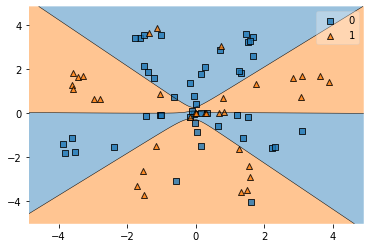

In [49]:
# Plot decision boundary
plot_decision_regions(X_test, y_test.reshape(-1), clf=model)
plt.show()

Accuracy is really high compared to Logistic Regression. The model has learnt the leaf patterns of the flower! Neural networks are able to learn even highly non-linear decision boundaries, unlike logistic regression. 

Now, let's try out several hidden layer sizes.

### 4.6 - Tuning hidden layer size (optional/ungraded exercise) ###

Run the following code. It may take 1-2 minutes. You will observe different behaviors of the model for various hidden layer sizes.

**Interpretation**:
- The larger models (with more hidden units) are able to fit the training set better, until eventually the largest models overfit the data. 
- The best hidden layer size seems to be around n_h = 5. Indeed, a value around here seems to  fits the data well without also incurring noticable overfitting.
- You might want to consider regularization, which lets you use very large models (such as n_h = 50) without much overfitting. 

Epoch 1/150
32/32 [==============================] - 0s 643us/step - loss: 0.6718 - accuracy: 0.6935
Epoch 2/150
32/32 [==============================] - 0s 607us/step - loss: 0.6711 - accuracy: 0.6697
Epoch 3/150
32/32 [==============================] - 0s 635us/step - loss: 0.6709 - accuracy: 0.6870
Epoch 4/150
32/32 [==============================] - 0s 600us/step - loss: 0.6719 - accuracy: 0.6598
Epoch 5/150
32/32 [==============================] - 0s 564us/step - loss: 0.6672 - accuracy: 0.6767
Epoch 6/150
32/32 [==============================] - 0s 604us/step - loss: 0.6677 - accuracy: 0.6689
Epoch 7/150
32/32 [==============================] - 0s 562us/step - loss: 0.6748 - accuracy: 0.6273
Epoch 8/150
32/32 [==============================] - 0s 550us/step - loss: 0.6564 - accuracy: 0.7127
Epoch 9/150
32/32 [==============================] - 0s 540us/step - loss: 0.6656 - accuracy: 0.6630
Epoch 10/150
32/32 [==============================] - 0s 541us/step - loss: 0.6568 - accura

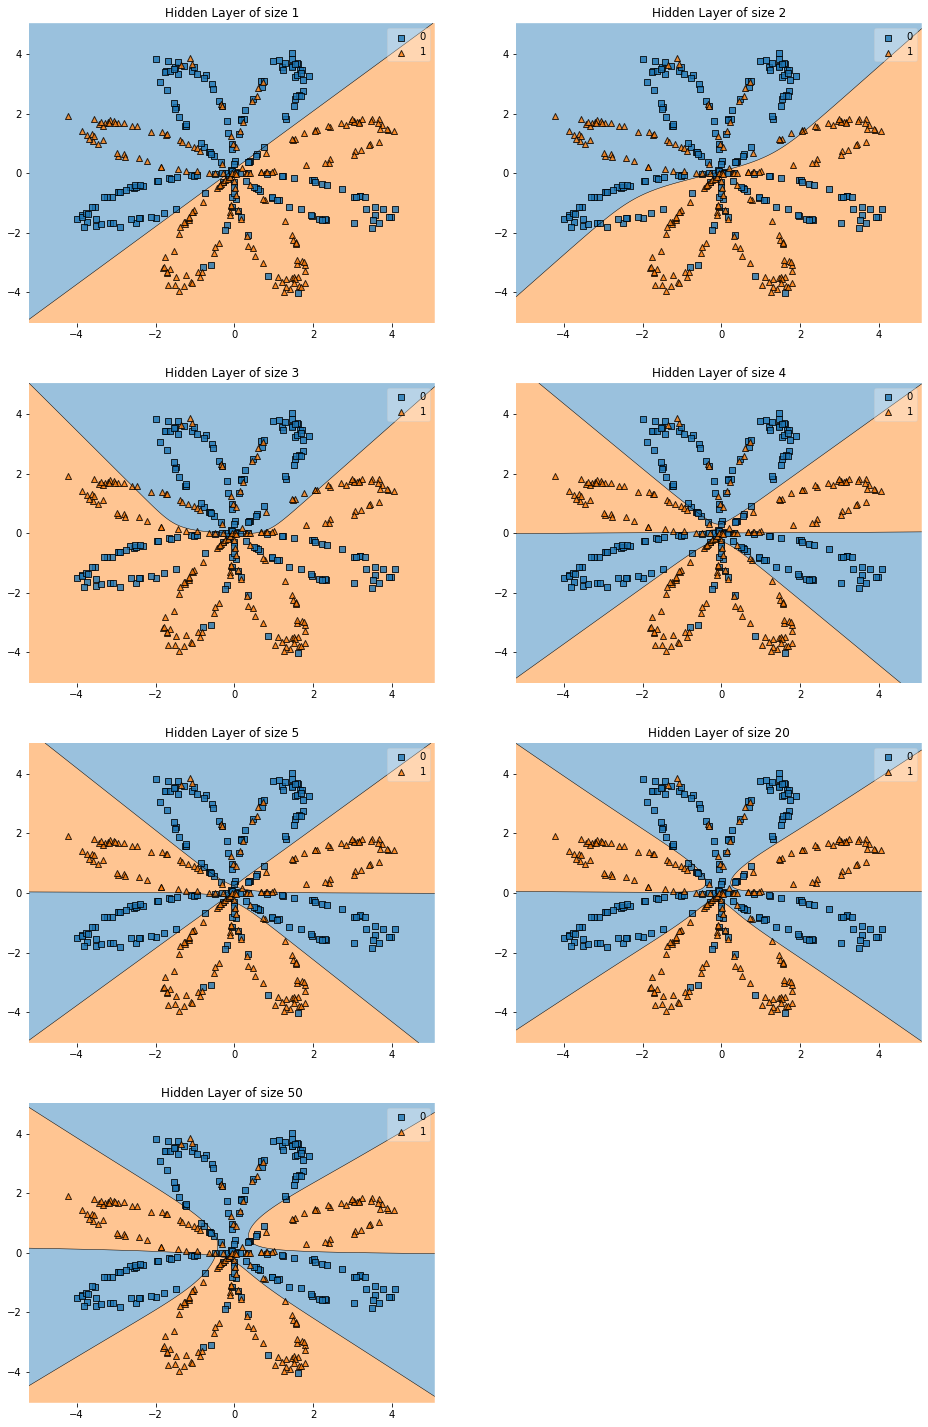

In [51]:
# Set plot size
plt.figure(figsize=(16, 32))
# https://www.geeksforgeeks.org/enumerate-in-python/
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    # Set plot location
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    model_i = build_model(input_dim = 2, first_hidden_layer_node_num = n_h, activation_function='sigmoid')
    model_i.fit(X_train, y_train, epochs=150, batch_size=10)
    plot_decision_regions(X, Y.reshape(-1), clf=model_i)
    _, accuracy = model_i.evaluate(X_test, y_test)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

**Optional Section**

Some optional/ungraded questions that you can explore if you wish: 
- What happens when you change the tanh activation for a sigmoid activation or a ReLU activation?
- Play with the learning_rate. What happens?
- What if we change the dataset? (See part 5 below!)

## 5) Performance on other datasets

If you want, you can rerun the whole notebook (minus the dataset part) for each of the following datasets.

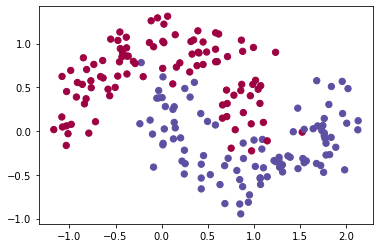

In [11]:
# Datasets
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

### START CODE HERE ### (choose your dataset)
dataset = "noisy_moons"
### END CODE HERE ###

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
    Y = Y%2

# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

Congrats on finishing this Programming Assignment!